## You will need the Anaconda Python Distribution to run the examples in this book and write your own Python programs for time series analysis. This is freely downloadable from https://www.continuum.io/downloads.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp -r "/content/drive/My Drive/Colab Notebooks/MSBA_Workshops/Data Files" "/content"

In [0]:
import pandas as pd
import pandas_datareader as pdr

In [0]:
aapl = pdr.get_data_yahoo('AAPL', '2005/12/12')

In [3]:
aapl.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-30,210.449997,207.199997,210.160004,208.740005,21143400.0,208.740005
2019-09-03,206.979996,204.220001,206.429993,205.699997,20023000.0,205.699997
2019-09-04,209.479996,207.320007,208.389999,209.190002,19188100.0,209.190002
2019-09-05,213.970001,211.509995,212.000000,213.279999,23913700.0,213.279999
2019-09-06,214.419998,212.509995,214.050003,213.259995,19350800.0,213.259995


In [0]:
import numpy as np
import os 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')

### Time series data is typically characterized by several interesting internal structures such as trend, seasonality, stationarity, autocorrelation, and so on.

## Time Series Data

Data taken from multiple individuals but at one point in time (cross-sectional)

### Taken from an individual entity but over multiple points in time (time series).

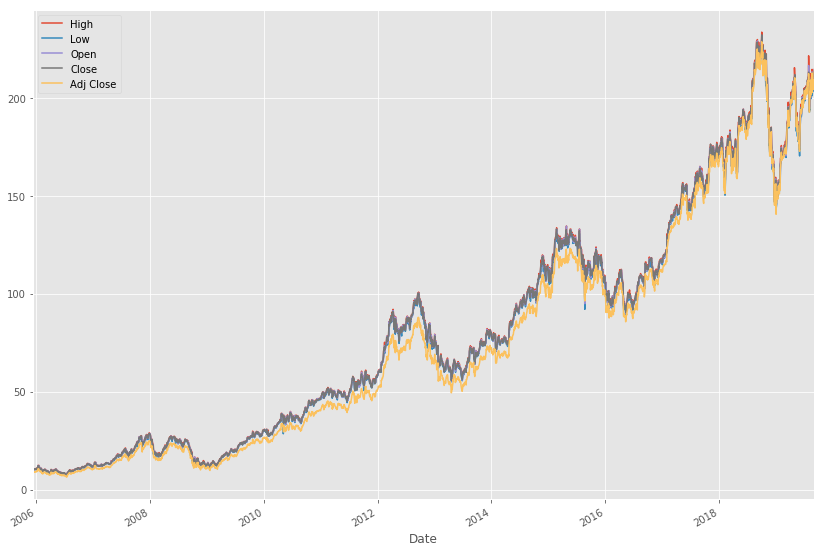

In [42]:
aapl.loc[:,aapl.columns != "Volume"].plot(figsize=(14,10));

## Panel Data

### Data for multiple entities over multiple points in time we get a panel data also known as longitudinal data.

In [0]:
googl = pdr.get_data_yahoo('GOOGL', '2005/12/12')
msft = pdr.get_data_yahoo('MSFT', '2005/12/12')
aapl['name'] = "aapl"
googl['name'] = "googl"
msft['name'] = 'msft'
df = pd.concat([aapl, googl, msft], axis=0)
df.reset_index(inplace=True)

In [45]:
df.name.value_counts()
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,name
10366,2019-08-30,139.179993,136.270004,139.149994,137.860001,23940100.0,137.860001,msft
10367,2019-09-03,137.199997,135.699997,136.610001,136.039993,18869300.0,136.039993,msft
10368,2019-09-04,137.690002,136.479996,137.300003,137.630005,17995900.0,137.630005,msft
10369,2019-09-05,140.380005,138.759995,139.110001,140.050003,26101800.0,140.050003,msft
10370,2019-09-06,140.179993,138.199997,140.029999,139.100006,20815600.0,139.100006,msft


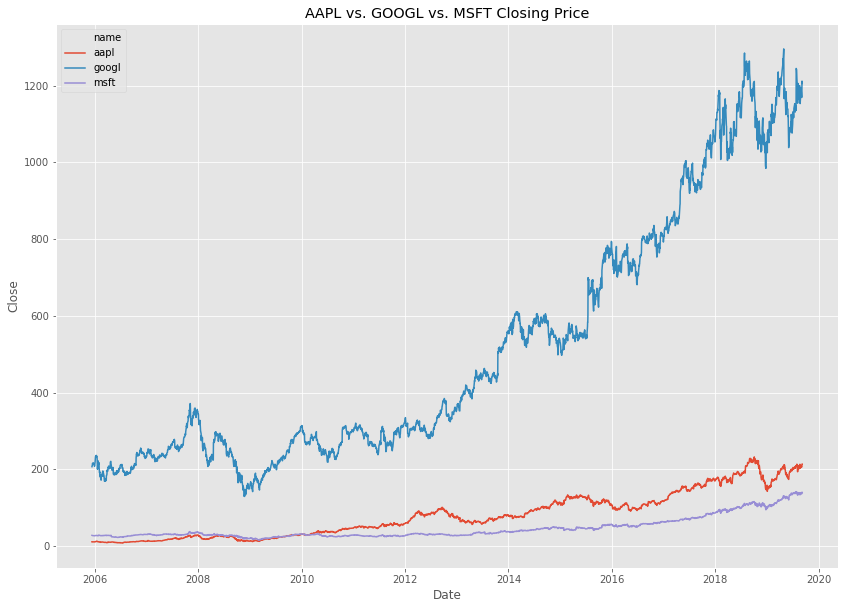

In [51]:
fig, ax = plt.subplots(figsize=(14,10))
plt.title("AAPL vs. GOOGL vs. MSFT Closing Price")
sns.lineplot(x=df.Date, y=df.Close, hue=df.name, ax=ax, );

In [36]:
df.groupby('name').tail()

,High,Low,Open,Close,Volume,Adj Close,name
Date,,,,,,,
2019-08-30,210.449997,207.199997,210.160004,208.740005,21143400.0,208.740005,aapl
2019-09-03,206.979996,204.220001,206.429993,205.699997,20023000.0,205.699997,aapl
2019-09-04,209.479996,207.320007,208.389999,209.190002,19188100.0,209.190002,aapl
2019-09-05,213.970001,211.509995,212.000000,213.279999,23913700.0,213.279999,aapl
2019-09-06,214.419998,212.509995,214.050003,213.259995,19350800.0,213.259995,aapl
2019-08-30,1200.349976,1185.719971,1200.349976,1190.530029,903200.0,1190.530029,googl
2019-09-03,1189.079956,1163.709961,1181.849976,1169.550049,1295400.0,1169.550049,googl
2019-09-04,1184.880005,1171.530029,1179.449951,1182.270020,1065600.0,1182.270020,googl
2019-09-05,1214.000000,1192.689941,1193.660034,1212.189941,1319700.0,1212.189941,googl


# Internal structures of time series

* **General trend**
* **Seasonality**
* **Cyclical movements**
* **Unexpected variations**


Sum of the trend, seasonal, cyclical, and irregular components in that order:  ***xt = ft + st + ct + et***

t is the time index at which observations about the series have been taken at t = 1,2,3 ...N successive and equally spaced points in time.

The objective of time series analysis is to decompose a time series into its constituent characteristics and develop mathematical models for each. These models are then used to understand what causes the observed behavior of the time series and to predict the series for future points in time.





## General trend

When a time series exhibits an upward or downward movement in the long run, it is said to have a general trend. However, general trend might not be evident over a short run of the series. Short run effects such as seasonal fluctuations and irregular variations cause the time series to revisit lower or higher values observed in the past and hence can temporarily obfuscate any general trend. Hence to reveal general trend, we need a time series that dates substantially back in the past.


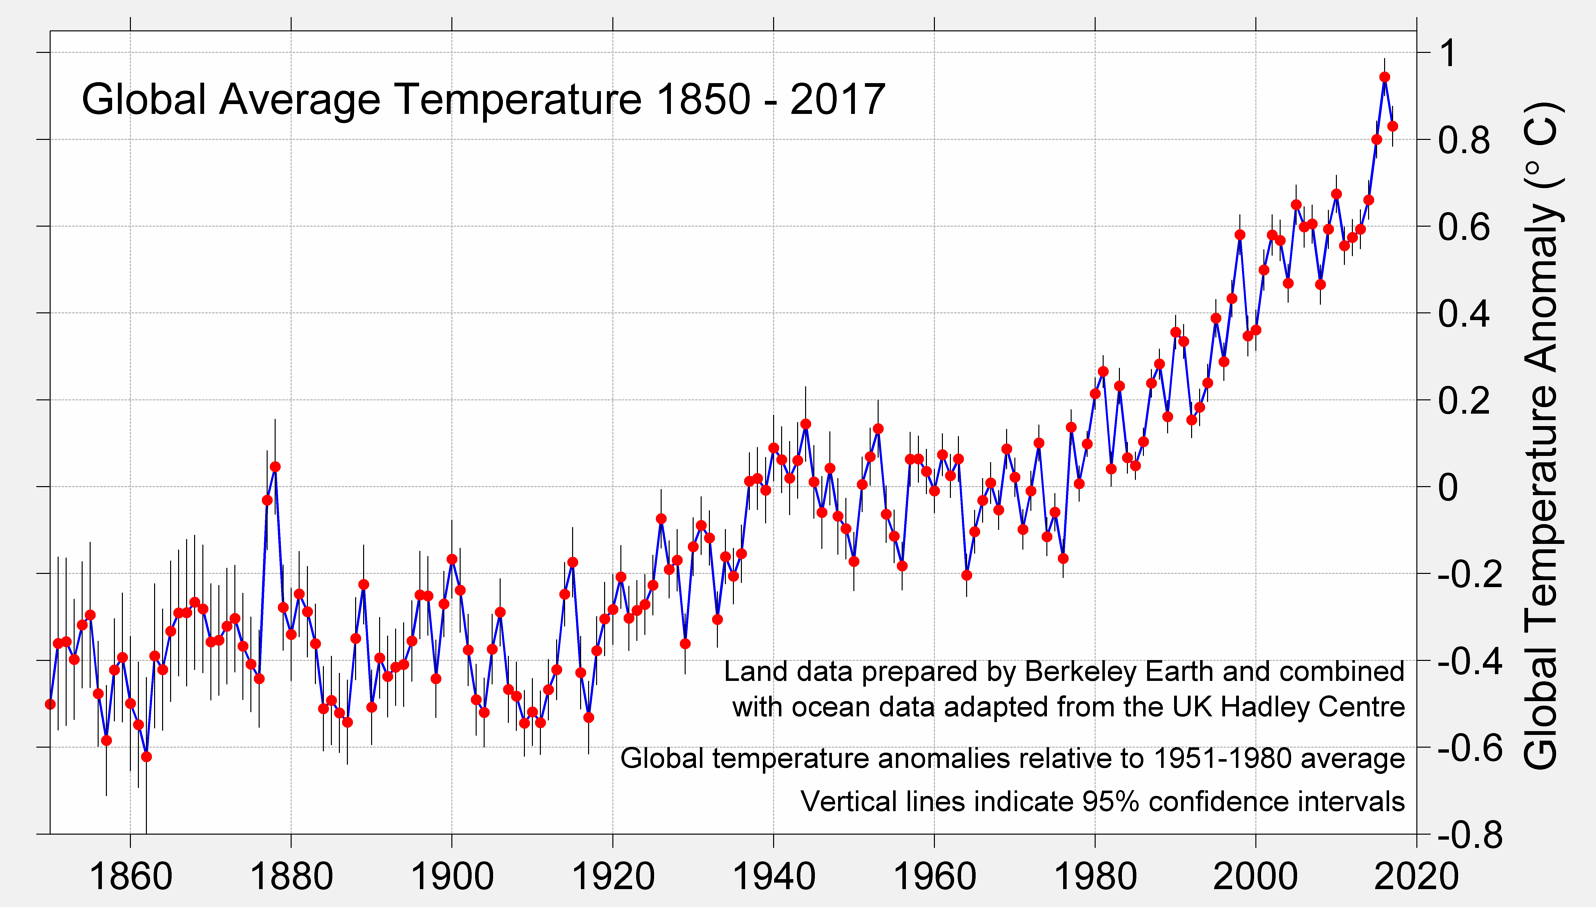

In [58]:
from IPython.display import Image
Image('TimeSeries2017.png', width=1200, height=600)

In [0]:
co2_data = pd.read_excel("/content/Data Files/Monthly_CO2_Concentrations.xlsx")

In [63]:
co2_data.head()

,CO2,Year,Month
0,333.13,1974.0,5.0
1,332.09,1974.0,6.0
2,331.10,1974.0,7.0
3,329.14,1974.0,8.0
4,327.36,1974.0,9.0


In [0]:
co2_data.index = pd.to_datetime(co2_data['Year'].astype(str)  + co2_data['Month'].astype(str) + "1")

In [0]:
co2_data.dropna(inplace=True)
co2_data.sort_values(['Year', 'Month'], inplace=True) 

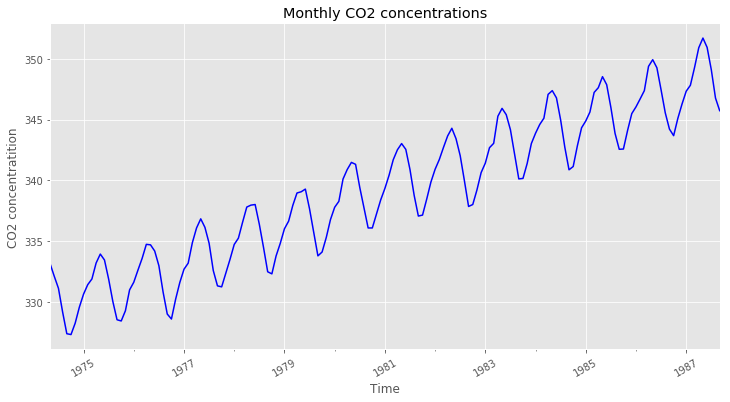

In [92]:
plt.figure(figsize=(12, 6))
co2_data['CO2'].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);

### *A* general trend is commonly modeled by setting up the time series as a regression against time and other known factors as explanatory variables. The regression or trend line can then be used as a prediction of the long run movement of the time series. Residuals left by the trend line is further analyzed for other interesting properties such as seasonality, cyclical behavior, and irregular variations.

In [94]:
from sklearn.linear_model import LinearRegression 
trend_model = LinearRegression(normalize=True, fit_intercept=True) 
trend_model.fit(np.array(co2_data.index).reshape((-1,1)), co2_data['CO2']) 
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0], 
                                                           trend_model.intercept_) 
      ) 

Trend model coefficient=4.6004424242880627e-17 and intercept=323.16626596468865


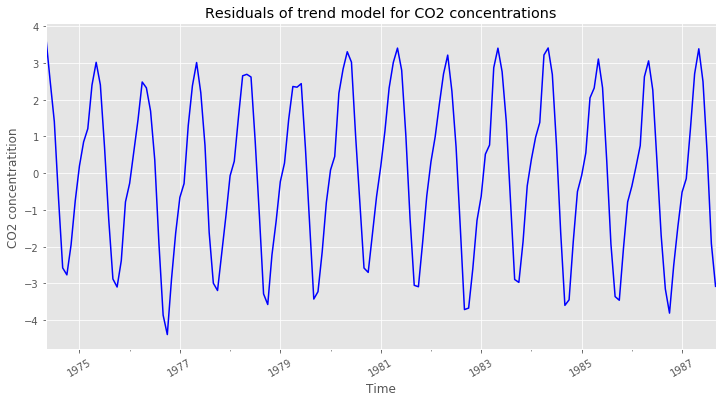

In [102]:
residuals = np.array(co2_data['CO2']) - trend_model.predict(np.array(co2_data.index.astype(int)).reshape((-1,1)))
plt.figure(figsize=(12, 6))
pd.Series(data=residuals, index=co2_data.index).plot(color='b')
plt.title('Residuals of trend model for CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);

## Seasonality

Seasonality manifests as repetitive and period variations in a time series.

* Run sequence plot
* Seasonal sub series plot
* Multiple box plot



In [0]:
co2_data['Residuals'] = residuals 
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1', 
                     4: 'Q2', 5: 'Q2', 6: 'Q2', 
                     7: 'Q3', 8: 'Q3', 9: 'Q3', 
                     10: 'Q4', 11: 'Q4', 12: 'Q4' 
                    } 
co2_data['Quarter'] = co2_data['Month'].map(lambda m: month_quarter_map.get(m))

A box plot displays both central tendency and dispersion within the seasonal data over a batch of time units. Separation between two adjacent box plots reveal the within season variations:

Variations within seasons as within a batch of successive months
Variations between seasons as between batches of successive months

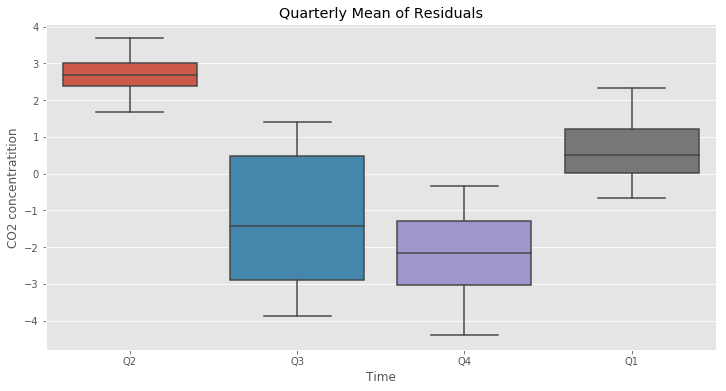

In [105]:
plt.figure(figsize=(12, 6)) 
g = sns.boxplot(data=co2_data, y='Residuals', x='Quarter') 
g.set_title('Quarterly Mean of Residuals') 
g.set_xlabel('Time') 
g.set_ylabel('CO2 concentratition') ;

 Quarterly mean of the residuals from a linear model of the general trend in CO2 readings

## Cyclical changes

Cyclical changes are movements observed after every few units of time, but they occur less frequently than seasonal fluctuations. Unlike seasonality, cyclical changes might not have a fixed period of variations. Besides, the average periodicity for cyclical changes would be larger (most commonly in years), whereas seasonal variations are observed within the same year and corresponds to annual divisions of time such as seasons, quarters, and periods of festivity and holidays and so on.

### Antcipating Recession from Cyclicity.



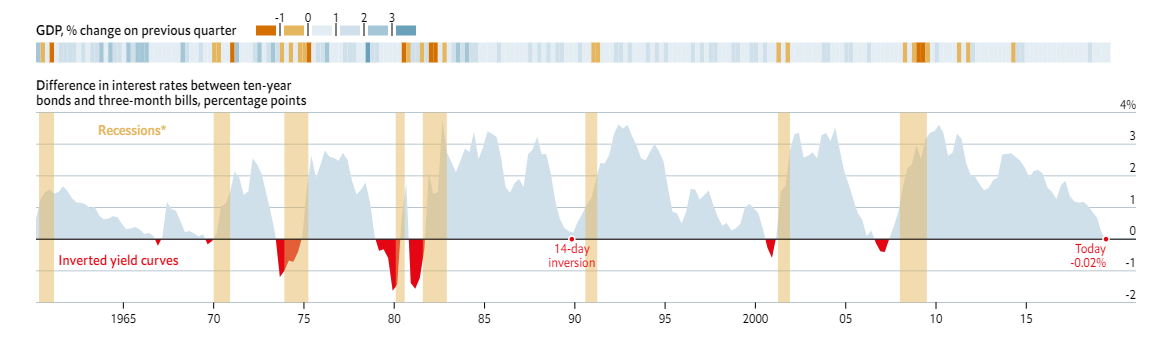

In [107]:
from IPython.display import Image
Image('/content/yield_curve.PNG', width=1000, height=400)

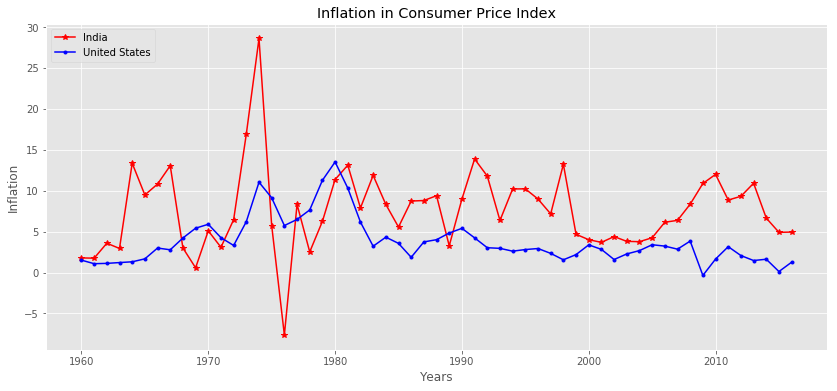

In [110]:
inflation = pd.read_excel('Data Files/inflation-consumer-prices-annual.xlsx', parse_dates=['Year']) 
plt.figure(figsize=(14, 6)) 
plt.plot(range(1960,2017), inflation['India'], linestyle='-', marker='*', color='r') 
plt.plot(range(1960,2017), inflation['United States'], linestyle='-', marker='.', color='b') 
plt.legend(['India','United States'], loc=2) 
plt.title('Inflation in Consumer Price Index') 
plt.ylabel('Inflation') 
plt.xlabel('Years') ;

## Unexpected variations

Error component that is random and does not exhibit systematic dependency on the time index. This fourth component reflects unexpected variations in the time series. Unexpected variations are stochastic and cannot be framed in a mathematical model for a definitive future prediction. This type of error is due to lack of information about explanatory variables that can model these variations or due to presence of a random noise.

# Models for time series analysis

* Zero mean models
* Random walk
* Trend models
* Seasonality models

The purpose of time series analysis is to develop a mathematical model that can explain the observed behavior of a time series and possibly forecast the future state of the series. The chosen model should be able to account for one or more of the internal structures that might be present.

# Autocorrelation and Partial Autocorrelation

Autocorrelation reflects the degree of linear dependency between the time series at index t and the time series at indices t-h or t+h. A positive autocorrelation indicates that the present and future values of the time series move in the same direction, whereas negative values means that present and future values move in the opposite direction. If autocorrelation is close to zero, temporal dependencies within the series may be hard to find. Because of this property, autocorrelation is useful in predicting the future state of a time series at h time steps ahead.

After applying the mathematical transformations discussed in the previous section, we will often be left with what is known as a stationary (or weakly stationary) time series, which is characterized by a constant mean E(xt) and correlation that depends only on the time lag between two time steps, but independent of the value of the time step. This type of covariance is the key in time series analysis and is called autocovariance or autocorrelation when normalized to the range of -1 to 1. Autocorrelation is therefore expressed as the second order moment E(xt,xt+h) = g(h) that evidently is a function of only the time lag h and independent of the actual time index t. This special definition of autocorrelation ensures that it is a time-independent property and hence can be reliably used for making inference about future realization of the time series.

In [0]:
djia = pdr.get_data_yahoo('DJIA','2018')

In [113]:
djia.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,24983.480469,24632.800781,24809.349609,24824.009766,3357250000,24824.009766
2018-01-03,25033.640625,24719.460938,24850.449219,24922.679688,3538660000,24922.679688
2018-01-04,25207.640625,24889.359375,24964.859375,25075.130859,3695260000,25075.130859
2018-01-05,25369.890625,24995.640625,25114.919922,25295.869141,3236620000,25295.869141
2018-01-08,25442.390625,25114.060547,25308.400391,25283.000000,3242650000,25283.000000


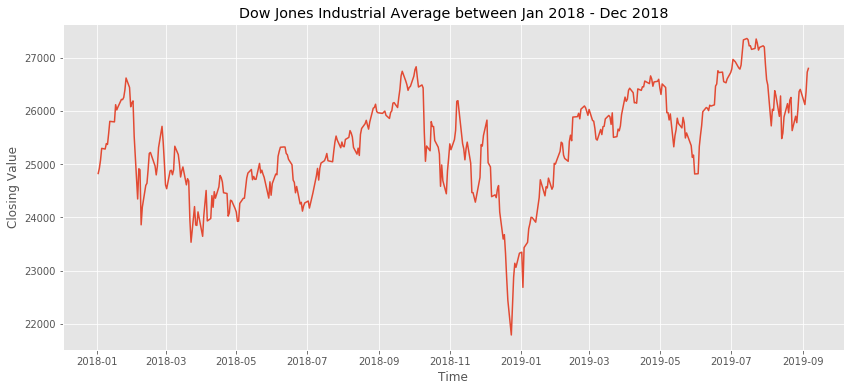

In [117]:
plt.figure(figsize=(14, 6)) 
g = sns.lineplot(djia.index, djia.Close) 
g.set_title('Dow Jones Industrial Average between Jan 2018 - Dec 2018') 
g.set_xlabel('Time') 
g.set_ylabel('Closing Value') ;

In [0]:
lag = range(0,31) 
djia_acf = [] 
for l in lag: 
    djia_acf.append(djia['Close'].autocorr(l)) 

The preceding code, iterates over a list of 31 values of the lag starting from 0 to 30. A lag of 0 indicates autocorrelation of an observation with itself (in other words self-correlation) and hence it is expected to be 1.0

Autocorrelation in DJIA Close values appears to linearly drop with the lag with an apparent change in the rate of the drop at around 15, 20 and 25 days.

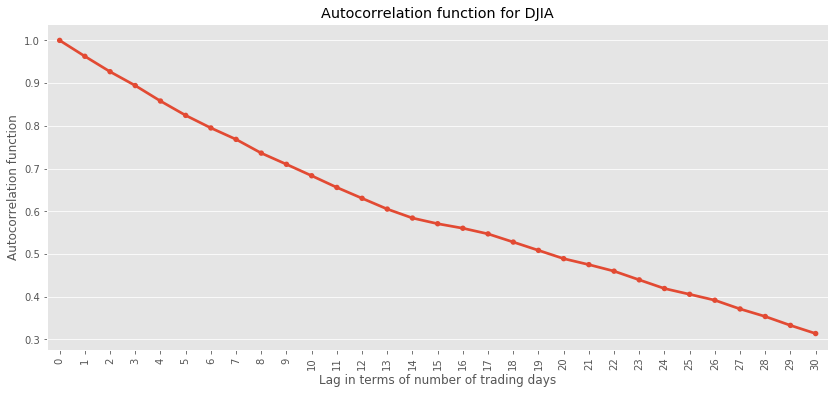

In [124]:
plt.figure(figsize=(14, 6)) 
g = sns.pointplot(x=list(lag), y=djia_acf, markers='.') 
g.set_title('Autocorrelation function for DJIA') 
g.set_xlabel('Lag in terms of number of trading days') 
g.set_ylabel('Autocorrelation function') 
g.set_xticklabels(lag, rotation=90) ;

 the plot_acf function of statsmodels.graphics.tsaplots to compute and plot the autocorrelation at various lags. Additionally, this function also plots the 95% confidence intervals. Autocorrelation outside these confidence intervals is statistically significant correlation while those which are inside the confidence intervals are due to random noise.

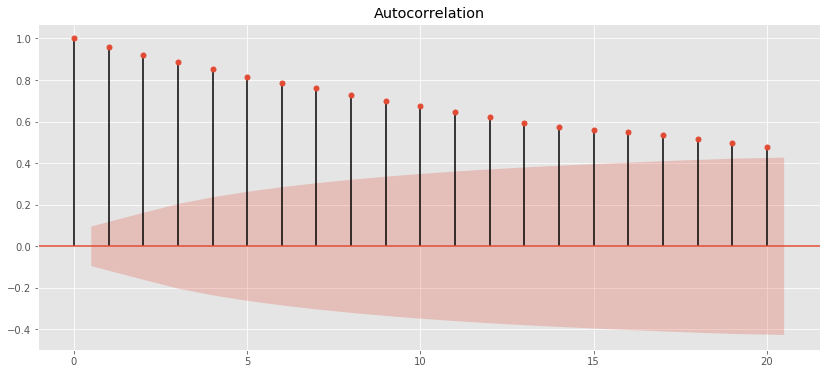

In [130]:
#Plot autocorrelation and confidence intervals using the plot_acf function
fig, ax = plt.subplots(figsize=(14, 6))
plot_acf(djia['Close'], lags=20, ax=ax);

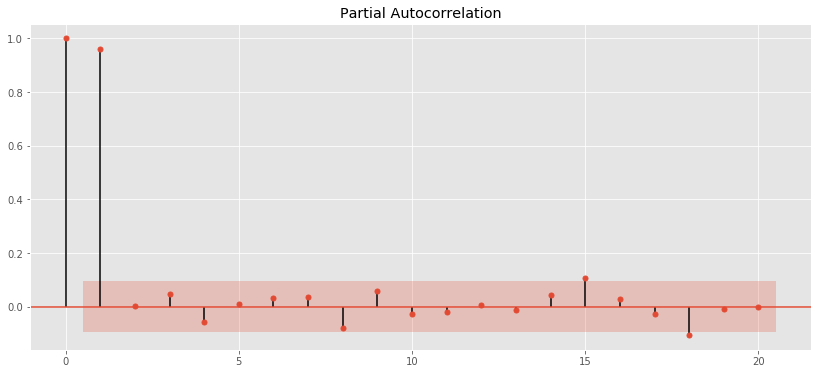

In [133]:
#Plot partial autocorrelation and confidence intervals using the plot_acf function
fig, ax = plt.subplots(figsize=(14, 6))
plot_pacf(djia['Close'], lags=20, ax=ax);

The first partial autocorrelation at lag zero is always 1.0. As seen in the preceding figure, the partial autocorrelation only at lag one is statistically significant while for rest the lags it is within the 95% confidence intervals. Hence, for DJIA Close Values the order of AR models is one.